## Observations and Insights 

The three observations that can be made from the data, as summarised in the tables and graphs below, are:
1. Mice on Capomulin or Ramicane treatment regime had a smaller final tumor volume than mice on Infubinol or Ceftamin treatment regime.
2. There are roughly equal number of female and male mice in this dataset.
3. In the group of mice treated with the Capomulin regimen, average tumor volume was strongly negativelly correlated with mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
n_mice=len(mouse_study["Mouse ID"].unique())
print(f"There are {n_mice} mice in this study.")

There are 249 mice in this study.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["ID_timepoint"] = mouse_study["Mouse ID"] + "_" + mouse_study["Timepoint"].astype(str)
mouse_duplicate = pd.DataFrame(mouse_study["ID_timepoint"].value_counts()>1)


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_alldata = pd.DataFrame()
for i in mouse_duplicate.index:
    if mouse_duplicate.loc[i,"ID_timepoint"]==True:
        mouse_duplicate_alldata = mouse_duplicate_alldata.append(\
                                  mouse_study.loc[mouse_study["ID_timepoint"]==i])
mouse_duplicate_alldata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,ID_timepoint
916,g989,Propriva,Female,21,26,20,55.326122,1,g989_20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989_20
908,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989_0
912,g989,Propriva,Female,21,26,10,51.745156,0,g989_10


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse = mouse_duplicate_alldata["Mouse ID"].unique()
for i in duplicate_mouse:
    mouse_study = mouse_study.drop(mouse_study.index[mouse_study["Mouse ID"]==i])


In [6]:
# Checking the number of mice in the clean DataFrame.
n_mice = len(mouse_study["Mouse ID"].unique())
print(f"There are {n_mice} mice in this study, after removal of mouse with duplicate data.")

There are 248 mice in this study, after removal of mouse with duplicate data.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = mouse_study.groupby(["Drug Regimen"])
count = drug_regimen_group[["Tumor Volume (mm3)"]].count()
count = count.rename(columns = {"Tumor Volume (mm3)":"count"})
mean = drug_regimen_group[["Tumor Volume (mm3)"]].mean()
mean = mean.rename(columns = {"Tumor Volume (mm3)":"mean"})
median = drug_regimen_group[["Tumor Volume (mm3)"]].median()
median = median.rename(columns = {"Tumor Volume (mm3)":"median"})
variance = drug_regimen_group[["Tumor Volume (mm3)"]].var()
variance = variance.rename(columns = {"Tumor Volume (mm3)":"variance"})
stdev = drug_regimen_group[["Tumor Volume (mm3)"]].std()
stdev = stdev.rename(columns = {"Tumor Volume (mm3)":"standard deviation"})
sem = drug_regimen_group[["Tumor Volume (mm3)"]].sem()
sem = sem.rename(columns = {"Tumor Volume (mm3)":"SEM"})

summary_drug_regimen = pd.concat([count,mean,median,variance,stdev,sem], axis=1)
summary_drug_regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,count,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_drug_regimen2 = mouse_study.groupby("Drug Regimen")\
                                        ["Tumor Volume (mm3)"].agg(\
                                        ["count","mean","median","var",\
                                         "std","sem"])
summary_drug_regimen2

# This method produces everything in a single groupby function


,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Mice Count Across Drug Regimens')

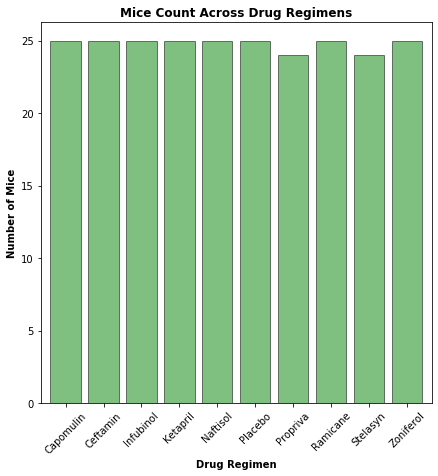

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
ID_regimen = pd.DataFrame(mouse_study.groupby("Drug Regimen")["Mouse ID"].nunique())
fig1 = ID_regimen.plot(kind="bar",alpha=0.5,color="green",edgecolor="black",\
                     figsize=(7,7),width=0.8,rot=45,legend=False)
fig1.set_xlabel("Drug Regimen", fontweight="bold")
fig1.set_ylabel("Number of Mice", fontweight="bold")
fig1.set_title("Mice Count Across Drug Regimens", fontweight="bold")


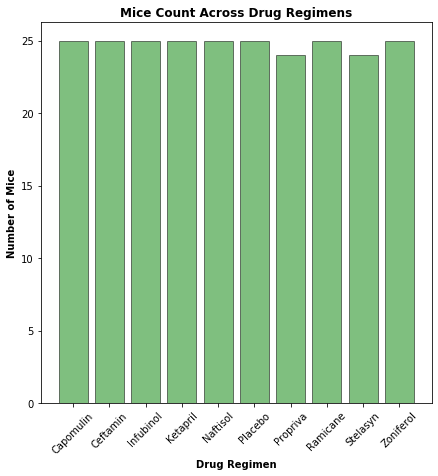

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(7,7))
plt.bar(ID_regimen.index,ID_regimen["Mouse ID"],alpha=0.5,color="green",\
        width=0.8,edgecolor="black")
plt.xlabel("Drug Regimen", fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Number of Mice", fontweight="bold")
plt.title("Mice Count Across Drug Regimens", fontweight="bold")
plt.show()

Text(0, 0.5, '')

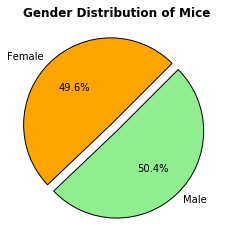

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ID_sex = mouse_study.groupby("Sex")["Mouse ID"].nunique()
fig2 = ID_sex.plot(kind="pie",explode=(0.1,0),colors=["orange","lightgreen"],\
                 wedgeprops={"edgecolor":"black"},labels=ID_sex.index,\
                 startangle=45,autopct="%1.1f%%")
fig2.set_title("Gender Distribution of Mice", fontweight="bold")
fig2.set_ylabel("")

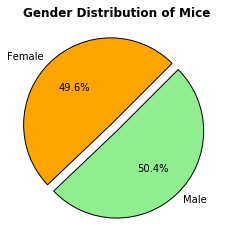

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(ID_sex,explode=(0.1,0),colors=["orange","lightgreen"],\
        wedgeprops={"edgecolor":"black"},labels=ID_sex.index,startangle=45,autopct="%1.1f%%")
plt.title("Gender Distribution of Mice", fontweight="bold")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_study_final = mouse_study[(mouse_study["Drug Regimen"]=="Capomulin")|\
                              (mouse_study["Drug Regimen"]=="Ramicane")|\
                              (mouse_study["Drug Regimen"]=="Infubinol")|\
                              (mouse_study["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
mouse_final_timepoint = pd.DataFrame(mouse_study_final.groupby(["Drug Regimen","Mouse ID"])\
                                   ["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_final_timepoint = pd.merge(mouse_final_timepoint,mouse_study_final,\
                               on=["Drug Regimen","Mouse ID","Timepoint"],how="left")
mouse_final_timepoint.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,ID_timepoint
0,Capomulin,b128,45,Female,9,22,38.982878,2,b128_45
1,Capomulin,b742,45,Male,7,21,38.939633,0,b742_45
2,Capomulin,f966,20,Male,16,17,30.485985,0,f966_20
3,Capomulin,g288,45,Male,3,19,37.074024,1,g288_45
4,Capomulin,g316,45,Female,22,22,40.159220,2,g316_45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = [[],[],[],[]]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
mouse_quart1 = mouse_final_timepoint.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(.25)
mouse_quart2 = mouse_final_timepoint.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(.50)
mouse_quart3 = mouse_final_timepoint.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(.75)
mouse_iqr = mouse_quart3-mouse_quart1
lower_bound = mouse_quart1 - (1.5*mouse_iqr)
upper_bound = mouse_quart3 + (1.5*mouse_iqr)
quartile_df = pd.concat([mouse_quart1,mouse_quart2,mouse_quart3,mouse_iqr,\
                       lower_bound,upper_bound],axis=1)
quartile_df.columns = ["1st quartile","2nd quartile","3rd quartile",\
                       "interquartile range (IQR)","lower bound","upper bound"]

for i in mouse_final_timepoint.index:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    curr_tumor_vol = mouse_final_timepoint.loc[i,"Tumor Volume (mm3)"]
    # add subset 
    for j in range(0,4):
        if mouse_final_timepoint.loc[i,"Drug Regimen"]==treatment[j]:
            tumor_vol[j].append(curr_tumor_vol)
    # Determine outliers using upper and lower bounds
            curr_lower_bound=lower_bound[lower_bound.index==treatment[j]].values.tolist()
            curr_upper_bound=upper_bound[upper_bound.index==treatment[j]].values.tolist()
            if (curr_tumor_vol < curr_lower_bound) | (curr_tumor_vol > curr_upper_bound):
                print(f"Tumor volume {round(curr_tumor_vol,2)} is an outlier in the {treatment[j]} treatment group.")

quartile_df.head()

Tumor volume 36.32 is an outlier in the Infubinol treatment group.


,1st quartile,2nd quartile,3rd quartile,interquartile range (IQR),lower bound,upper bound
Drug Regimen,,,,,,
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811


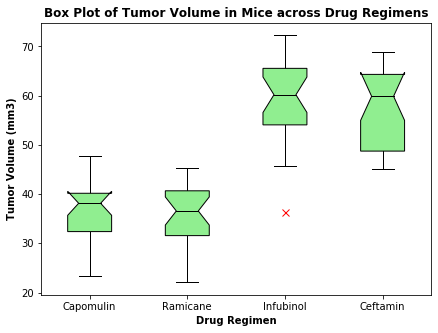

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(7,5))
plt.boxplot(tumor_vol,labels=treatment,notch=True,patch_artist=True,\
            boxprops=dict(facecolor="lightgreen", color="black"),\
            flierprops=dict(marker='x',markersize=7, markeredgecolor="red"),\
            medianprops=dict(color="black"))
plt.title("Box Plot of Tumor Volume in Mice across Drug Regimens", fontweight="bold")
plt.xlabel("Drug Regimen", fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", fontweight="bold")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

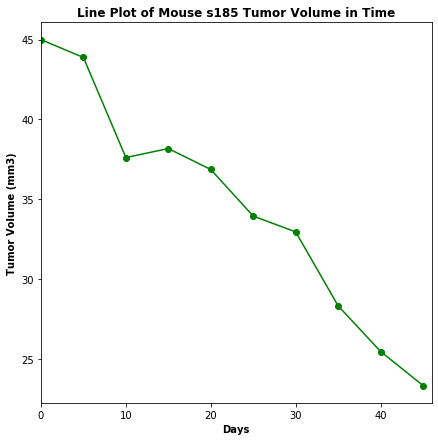

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
for i in mouse_study_final.index:
    if mouse_study_final.loc[i,"Drug Regimen"]=="Capomulin":
        select_mouse = mouse_study_final.loc[i,"Mouse ID"]
        break
select_mouse_df = mouse_study_final[mouse_study_final["Mouse ID"]==select_mouse]
select_mouse_df
plt.figure(figsize=(7,7))
plt.plot(select_mouse_df["Timepoint"],select_mouse_df["Tumor Volume (mm3)"],\
         color="green",marker="o")
plt.title(f"Line Plot of Mouse {select_mouse} Tumor Volume in Time",fontweight="bold")
plt.xlabel("Days",fontweight="bold")
plt.ylabel("Tumor Volume (mm3)",fontweight="bold")
plt.xlim(0,select_mouse_df["Timepoint"].max()+1)
plt.show

Text(0, 0.5, 'Tumor Volume (mm3)')

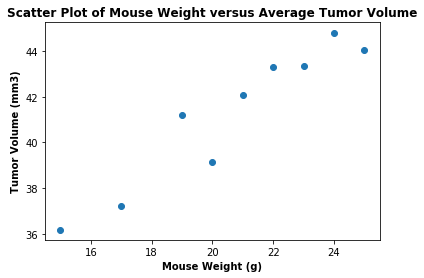

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Assuming that 'average tumor volume' means the average volume by weight, so grouping mouse data by weight to get the mean vol
mouse_study_capomulin = mouse_study[(mouse_study["Drug Regimen"]=="Capomulin")]
avgtumor_weight = pd.DataFrame(mouse_study_capomulin.groupby("Weight (g)")["Tumor Volume (mm3)"].mean())
plt.scatter(avgtumor_weight.index,avgtumor_weight["Tumor Volume (mm3)"])
plt.title("Scatter Plot of Mouse Weight versus Average Tumor Volume",fontweight="bold")
plt.xlabel("Mouse Weight (g)",fontweight="bold")
plt.ylabel("Tumor Volume (mm3)",fontweight="bold")

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope,intercept,rval,pval,stderror)=sts.linregress(avgtumor_weight.index,avgtumor_weight["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(rval,2)}")
print(f"The linear regression model is: y = {round(intercept,2)} + {round(slope,2)}x,\nwhere y = average tumor volume, and x = mouse weight")


The correlation coefficient between mouse weight and average tumor volume is 0.95
The linear regression model is: y = 22.76 + 0.89x,
where y = average tumor volume, and x = mouse weight


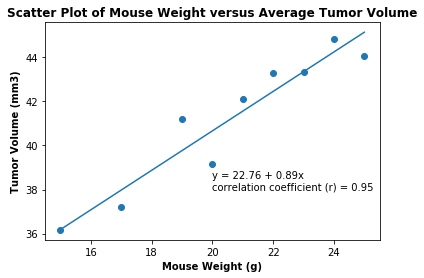

In [20]:
# plot scatter plot of mouse weight vs. average tumor volume and linear regression line
pred_y=intercept+slope*avgtumor_weight.index
plt.scatter(avgtumor_weight.index,avgtumor_weight["Tumor Volume (mm3)"])
plt.title("Scatter Plot of Mouse Weight versus Average Tumor Volume",fontweight="bold")
plt.xlabel("Mouse Weight (g)",fontweight="bold")
plt.ylabel("Tumor Volume (mm3)",fontweight="bold")
plt.annotate(f"y = {round(intercept,2)} + {round(slope,2)}x\ncorrelation coefficient (r) = {round(rval,2)}",(20,38))
plt.plot(avgtumor_weight.index,pred_y)